### PYCARET: Iris Species Classification Using Auto ML (pycaret)

https://medium.com/analytics-vidhya/iris-species-using-auto-ml-pycaret-327985fb362f

https://www.kaggle.com/jerryjohn1995/iris-species-best-simple-accurate-100-pycaret

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Data visualisation 
import matplotlib.pyplot as plt # Data visualisation 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.



import shap

In [2]:
dataset = pd.read_csv(r'C:\Users\OOlajide\Working Folder\All Python Data\TriageBalanced.csv')

In [3]:
# Showing first 5 rows.

dataset.head()

,Order_ID,VISIT_ID,ARRIVAL_DATE,Urgent_c,Urgent,Transport,Age,Gender,Visit_Reason,REFER_SOURCE,AVPU,PulseRate,RespiratoryRate,SP02,Temperature
0,1,V2-B20200810075626424,10/08/2020,MINOR,0,Other,3,female,Allergy (Including Anaphylaxis),SELF,Alert,127,20,95,36.8
1,1,V2-B20200809220138629,09/08/2020,MINOR,0,Other,1,male,Infectious Disease,OTHER,Alert,146,56,96,37.8
2,1,V2-B20200809214530394,09/08/2020,MINOR,0,Other,0,female,Diagnosis Not Classifiable,SELF,Alert,168,40,100,36.9
3,1,V2-B20200809201657488,09/08/2020,MINOR,0,Other,0,male,Gastrointestinal Conditions,SELF,Alert,139,40,97,37.0
4,1,V2-B20200809194603552,09/08/2020,MINOR,0,Other,12,female,Other Vascular Conditions,SELF,Alert,88,22,100,36.8


## 5. Checking the datasets whether balanced or unbalanced

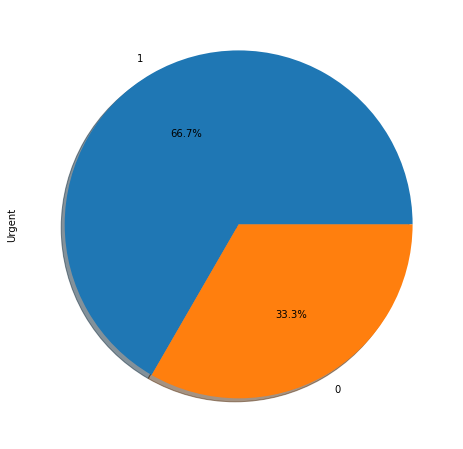

In [4]:
dataset['Urgent'].value_counts().plot.pie(#explode=[0.1,0.1],
                                           autopct='%1.1f%%',
                                           shadow=True,
                                           figsize=(10,8))
plt.show()

### 6. Preparing the data for model selection

In [5]:
# data = dataset.sample(frac=0.7, random_state=786).reset_index(drop=True)
# data_unseen = dataset.drop(data.index).reset_index(drop=True)

In [6]:
# print('Data for Modeling: ' + str(data.shape))
# print('Unseen Data For Predictions ' + str(data_unseen.shape))

In [3]:
dataset['Urgent'].value_counts()

1    239046
0    119523
Name: Urgent, dtype: int64

### 7. Importing pycaret classification method¶

In [4]:
# Imporing pycaret classification method
from pycaret.classification import *

In [5]:
# couple of key parameters
num_folds = 5

In [6]:
# This is the first step of model selection
# Here the data is our dataset, target is the labeled column(dependent variable), session is random number for future identification.
exp = setup(data = dataset, 
            target = 'Urgent',
            ignore_features=['Order_ID', 'VISIT_ID', 'ARRIVAL_DATE','Urgent_c'],
            normalize = True, 
            transformation = True,
           # ignore_low_variance = True,
            remove_outliers = True,
            numeric_imputation = "median",
            categorical_imputation = "mode",
            normalize_method = "minmax",
            fix_imbalance = True,
            # transform_target = True, 
            # combine_rare_levels = True, 
            # rare_level_threshold = 0.1,
            #remove_multicollinearity = True, 
            #multicollinearity_threshold = 0.95,
          # bin_numeric_features = ['Age', 'PulseRate', 'RespiratoryRate', 'SP02', 'Temperature'],
            session_id=42 )

# After this we will get a list of our columns and its type, just conferm they are the same. Then hit enter.

Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(358569, 15)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### 8. Comparing the models

In [8]:
# Let's have a look at the test dataset created by the set-up (slot 2 here is X_train, 3 is X_test, 4 is y_train, 5 is y_test, 0 is all features, 1 is all y)
X_test = exp[2]
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PulseRate,248831.0,0.036013,0.993461,-4.269585,-0.685753,0.052367,0.751274,6.019170
RespiratoryRate,248831.0,0.035731,0.997904,-5.581254,-0.626484,-0.152388,0.921332,3.088425
SP02,248831.0,-0.017112,1.002585,-2.717556,-0.717946,0.125274,0.667578,1.309807
Temperature,248831.0,0.004092,0.357505,-4.876225,-0.208219,-0.067414,0.120268,2.227055
Transport_Ambulance,248831.0,0.233070,0.422787,0.000000,0.000000,0.000000,0.000000,1.000000
Transport_Helicopter,248831.0,0.007873,0.088379,0.000000,0.000000,0.000000,0.000000,1.000000
Transport_Other,248831.0,0.759057,0.427656,0.000000,1.000000,1.000000,1.000000,1.000000
Age_0,248831.0,0.195378,0.396492,0.000000,0.000000,0.000000,0.000000,1.000000
Age_1,248831.0,0.172229,0.377580,0.000000,0.000000,0.000000,0.000000,1.000000
Age_10,248831.0,0.022863,0.149467,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
# Compare models will actually contrast 14 different classifiers, but here lets restrict to a few we feel might be 
# good candidates to start with, so lets try a few boosting approaches (gradient, extreme and light), 
# SVMs (linear, radial basis), random forest 
compare_models(whitelist = ['lr', 'catboost','et','xgboost','lightgbm', 'knn'],
               fold=num_folds)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8987,0.9422,0.9238,0.9253,0.9245,0.7703,0.7703,58.6376
1,Extreme Gradient Boosting,0.8979,0.9404,0.9233,0.9247,0.9240,0.7686,0.7686,36.6526
2,Light Gradient Boosting Machine,0.8971,0.9400,0.9186,0.9275,0.9230,0.7676,0.7677,2.4775
3,Logistic Regression,0.8921,0.9313,0.9077,0.9301,0.9188,0.7583,0.7588,4.2950
4,Extra Trees Classifier,0.8836,0.9297,0.9055,0.9200,0.9127,0.7381,0.7383,16.2655
5,K Neighbors Classifier,0.8696,0.9123,0.8691,0.9322,0.8996,0.7143,0.7178,5.3392


### Codes for different models are given below.

- Logistic Regression ‘lr’
- K Nearest Neighbour ‘knn’
- Naives Bayes ‘nb’
- Decision Tree ‘dt’
- SVM (Linear) ‘svm’
- SVM (RBF) ‘rbfsvm’
- Gaussian Process ‘gpc’
- Multi Level Perceptron ‘mlp’
- Ridge Classifier ‘ridge’
- Random Forest ‘rf’
- Quadratic Disc. Analysis ‘qda’
- AdaBoost ‘ada’
- Gradient Boosting Classifier ‘gbc’
- Linear Disc. Analysis ‘lda’
- Extra Trees Classifier ‘et’
- Extreme Gradient Boosting ‘xgboost’
- Light Gradient Boosting ‘lightgbm’
- Cat Boost Classifier ‘catboost’

### 9. Creating the model

In [7]:
# With this command we are creating a Naives Byes model
# The code for Naives Byes is " nb "
# fold is the number of fold you want

xgboost_model = create_model('xgboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8970,0.9403,0.9224,0.9241,0.9233,0.7665,0.7665
1,0.8975,0.9404,0.9220,0.9252,0.9236,0.7679,0.7679
2,0.9007,0.9424,0.9246,0.9274,0.9260,0.7751,0.7751
3,0.8993,0.9402,0.9260,0.9243,0.9251,0.7712,0.7712
4,0.8952,0.9386,0.9213,0.9226,0.9220,0.7624,0.7624
Mean,0.8979,0.9404,0.9233,0.9247,0.9240,0.7686,0.7686
SD,0.0019,0.0012,0.0017,0.0016,0.0014,0.0043,0.0043


In [6]:
# With this command we are creating a Naives Byes model
# The code for Naives Byes is " nb "
# fold is the number of fold you want

#xgboost_model = create_model('xgboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9050,0.9570,0.9284,0.8874,0.9074,0.8100,0.8109
1,0.9076,0.9592,0.9280,0.8922,0.9097,0.8153,0.8159
2,0.9070,0.9591,0.9314,0.8885,0.9095,0.8140,0.8149
3,0.9075,0.9595,0.9304,0.8901,0.9098,0.8149,0.8158
4,0.9061,0.9585,0.9255,0.8915,0.9082,0.8122,0.8128
Mean,0.9066,0.9586,0.9288,0.8899,0.9089,0.8133,0.8141
SD,0.0010,0.0009,0.0021,0.0018,0.0009,0.0019,0.0019


## 10. Tuning the hyper parameters

In [8]:
xgboost_tuned = tune_model(xgboost_model, fold = 5)

In [10]:
# save transformation pipeline and model 
save_model(xgboost_tuned, model_name = 'deployment_12082020')

Transformation Pipeline and Model Succesfully Saved


In [14]:
# using evaluate model provides a summary of many outputs that can be obtained individually via plot_model()
evaluate_model(xgboost_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 11. Plotting the ROC Curves

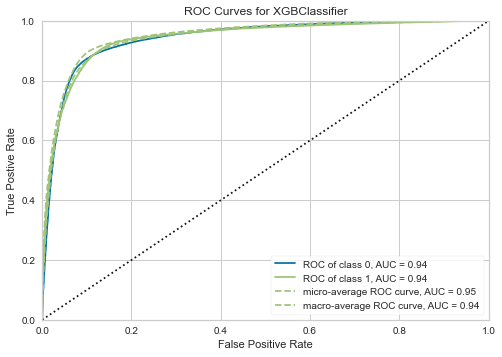

In [16]:
plot_model(xgboost_tuned, plot = 'auc')

## 12. Confusion Matrix

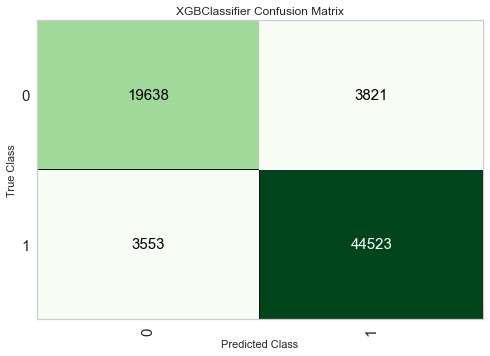

In [17]:
plot_model(xgboost_tuned, plot = 'confusion_matrix')

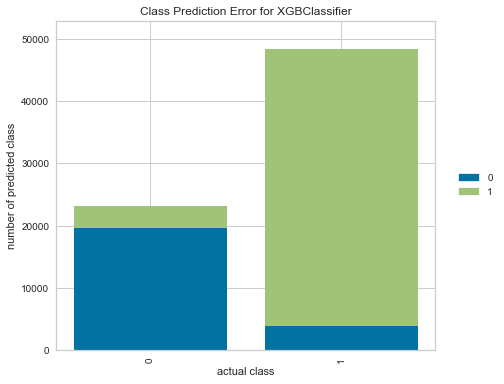

In [18]:
# plotting number of correctly  
# classified and misclassifed labels 
plot_model(xgboost_tuned, plot = 'error')

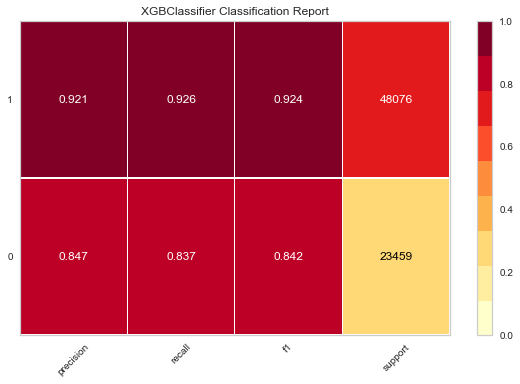

In [19]:
# plotting classification report 
plot_model(xgboost_tuned, plot = 'class_report')

In [14]:
# finalizing the tuned_model 
finalize_model(xgboost_tuned)

## 13. Predicting the accuracy using the test dataset.

### Performance on the hold out set

## 14. Checking with the unseen data

Initially we separated a part of the datasets as unseen data set for checking the final developed model. Below we are checking this. The result is a data frame with Label and the score(last two columns). Where the label is the predicted label and score is how much percentage does the machine think of having an accuracy.

In [20]:
new_prediction = predict_model(xgboost_tuned)

new_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8969,0.9416,0.9261,0.921,0.9235,0.7655,0.7655


,PulseRate,RespiratoryRate,SP02,Temperature,Transport_Ambulance,Transport_Helicopter,Transport_Other,Age_0,Age_1,Age_10,...,Visit_Reason_Urological Conditions (Including Cystitis),REFER_SOURCE_AE,REFER_SOURCE_CONS IN HOSP,REFER_SOURCE_OTHER,REFER_SOURCE_SELF,AVPU_Alert,AVPU_Verbal,Urgent,Label,Score
0,-0.242179,-0.297970,0.055307,-0.197798,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.8974
1,0.758134,1.490511,0.610188,-0.197798,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.8810
2,0.186184,0.922597,1.274060,-0.030317,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.2221
3,0.079045,0.922597,0.610188,0.178923,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0.9492
4,0.400560,0.605940,-0.408056,0.053394,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0.0594


### Developing some thresholds for risk groups

Now the last task we will do, which is mainly to support the next step which is to use the deploy the developed model in Dash for use in the example context of a pilot, is to create some risk groups which will link to different sets of recommended actions. Of course this is a gross over-simplification especially in a medical context, and of course we are also not taking into account cost vs benefit here.

The general approach we follow it to create a response plot - the percentage of patients with Major Triage in the test set by risk deciles according to the predcited probability of heart disease from the trained and tuned model. We will then identify some groups where there is a clear high likelihood or low likelihood the patient will have heart disease. Based on the cut-points in predicted probability we will use these in our Dash application.

In [30]:
# Lets create some thresholds for use in the application we will develop
pred = pd.Series(xgboost_tuned.predict_proba(exp[3])[:,1])
pred.index = range(len(pred.index))
labels_all = pd.Series(exp[5])
labels_all.index = range(len(labels_all.index))
full_pred = pd.concat([pred, labels_all], axis=1)
full_pred.columns = ['pred_pr', 'hd']

# lets bin into deciles and create data for a response plot to define some working thresholds for the pilot app
full_pred['deciles'], lims = pd.qcut(full_pred['pred_pr'], 10, labels=range(1,11), retbins=True)
agg_pred = full_pred.groupby('deciles').agg(p_correct = ('hd', 'mean'),
                                            sum_y = ('hd', 'sum'),
                                            count = ('hd', 'count')).reset_index().sort_values(by='deciles', ascending=False)

agg_pred['cumm_target'] = agg_pred['sum_y'].cumsum()
agg_pred['cumm_patients'] = agg_pred['count'].cumsum()
agg_pred['cumm_pct'] = agg_pred['cumm_target']/agg_pred['cumm_patients']
agg_pred['r_limit'] = lims[agg_pred['deciles']]

# apply mapping
agg_pred['risk_group'] = np.where(agg_pred['deciles'].isin([1,2]), 'Low risk',
                                 np.where(agg_pred['deciles'].isin([3,4]), 'Medium risk', 'High risk'))
agg_pred

,deciles,p_correct,sum_y,count,cumm_target,cumm_patients,cumm_pct,r_limit,risk_group
9,10,0.994688,7116,7154,7116,7154,0.994688,0.999989,High risk
8,9,0.985600,7050,7153,14166,14307,0.990145,0.990773,High risk
7,8,0.973721,6966,7154,21132,21461,0.984670,0.980578,High risk
6,7,0.959178,6861,7153,27993,28614,0.978297,0.966996,High risk
5,6,0.925066,6617,7153,34610,35767,0.967652,0.944490,High risk
4,5,0.859379,6148,7154,40758,42921,0.949605,0.900326,High risk
3,4,0.623235,4458,7153,45216,50074,0.902984,0.822030,Medium risk
2,3,0.223931,1602,7154,46818,57228,0.818096,0.343787,Medium risk
1,2,0.109045,780,7153,47598,64381,0.739318,0.144527,Low risk
0,1,0.066816,478,7154,48076,71535,0.672063,0.086423,Low risk


In [31]:
risk_group_stats = agg_pred.groupby('risk_group').agg(sum_y = ('sum_y', 'sum'), sum_n = ('count', 'sum')).reset_index()
risk_group_stats['percent'] = risk_group_stats['sum_y']/risk_group_stats['sum_n']
risk_group_stats.drop(['sum_y', 'sum_n'], axis=1)
risk_group_stats['risk_group_pct'] = risk_group_stats['risk_group'] + " (" + np.round(risk_group_stats['percent'],2).astype(str) + ")"
risk_group_stats

,risk_group,sum_y,sum_n,percent,risk_group_pct
0,High risk,40758,42921,0.949605,High risk (0.95)
1,Low risk,1258,14307,0.087929,Low risk (0.09)
2,Medium risk,6060,14307,0.423569,Medium risk (0.42)


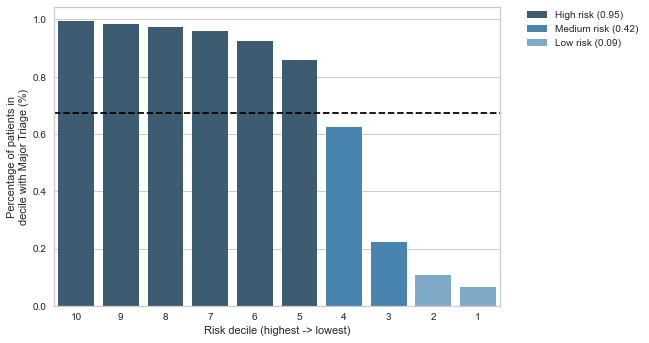

In [32]:
# create the plot
agg_pred1 = pd.merge(agg_pred, risk_group_stats, on='risk_group', how='left')
ax = sns.barplot(x='deciles', y='p_correct', data=agg_pred1, hue='risk_group_pct', dodge=False, order=agg_pred['deciles'], palette="Blues_d")
ax.axhline(agg_pred.sum_y.sum()/agg_pred['count'].sum(), ls='--', color='black')
ax = ax.set(xlabel="Risk decile (highest -> lowest)", ylabel = "Percentage of patients in\ndecile with Major Triage (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# save this figure for article
plt.savefig("Fig_10_risk_groups.png", bbox_inches = "tight")

In [ ]:
# finalize the model (i.e., re-train using all available data)
hd_model = finalize_model(xgboost_tuned)

# save the final trained model for use in our application and also save the experiment as well
save_model(hd_model, 'heart_disease_predition_model_Jul2020')
save_experiment('heart_disease_experiment_Jul2020')

In [20]:
full_pred.to_csv('Triage_deciles2.csv', index = False)

In [ ]:
# Let's also see if we can do other SHAP value plots directly on the model object and choose whether we use prepared test or
# train data as above call for PyCaret appears to use test data
import shap
model = exp[8][9][1]

# SHAP with test data (as is done via PyCaret)
X_test = exp[3]
explainer_test = shap.TreeExplainer(model)
shap_values_test = explainer_test.shap_values(X_test)

In [ ]:
# alternative summary plot
shap.summary_plot(shap_values_test, X_test, plot_type="bar", show=False)
#plt.savefig("SHAP_importance_for_dashboard.png", bbox_inches = "tight")

### Save Model

In [29]:
# saving the model 
save_model(xgboost_tuned, 'xgboost_tuned_2016')

Transformation Pipeline and Model Succesfully Saved


### Ensemble learning

In [19]:
# stack multiple models dynamically
top7 = compare_models(n_select = 7)
stacker = stack_models(estimator_list = top7[1:], meta_model = top7[0])

IntProgress(value=0, description='Processing: ', max=182)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:13:48
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
ETC,. . . . . . . . . . . . . . . . . .,Almost Finished


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7337,0.0,0.5390,0.6987,0.7066,0.3685,0.3807,83.4120
1,Extreme Gradient Boosting,0.7314,0.0,0.5326,0.6944,0.7023,0.3583,0.3719,25.0136
2,Light Gradient Boosting Machine,0.7266,0.0,0.5525,0.6973,0.7025,0.3714,0.3805,2.9608
3,Extra Trees Classifier,0.6949,0.0,0.5315,0.6822,0.6876,0.3333,0.3342,23.2673
4,Random Forest Classifier,0.6937,0.0,0.5293,0.6849,0.6890,0.3346,0.3350,2.5696
5,Gradient Boosting Classifier,0.6839,0.0,0.5767,0.6994,0.6844,0.3600,0.3651,50.9714
6,Ada Boost Classifier,0.6716,0.0,0.5666,0.6950,0.6754,0.3452,0.3511,14.1659
7,SVM - Linear Kernel,0.6647,0.0,0.5448,0.6845,0.6440,0.3179,0.3362,1.5596
8,Ridge Classifier,0.6642,0.0,0.5616,0.6912,0.6622,0.3326,0.3437,0.3359
9,Linear Discriminant Analysis,0.6585,0.0,0.5674,0.6948,0.6644,0.3351,0.3448,1.4659


MemoryError: 

In [ ]:
catboost  =  create_model ('catboost') 
xgboost  =  create_model ('xgboost')
lgbm  =  create_model ('lightgbm')
ensemble  =  blend_models ([catboost, xgboost, lgbm], fold = 5)

In [21]:
#catboost  =  create_model ('catboost') 
#xgboost  =  create_model ('xgboost')
#lgbm  =  create_model ('lightgbm')
#ensemble  =  blend_models ([catboost, xgboost, lgbm], fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7220,0.0000,0.5496,0.6941,0.6969,0.3611,0.3708
1,0.7327,0.0000,0.5564,0.7042,0.7070,0.3824,0.3931
2,0.7272,0.0000,0.5538,0.6965,0.7010,0.3737,0.3836
3,0.7324,0.0000,0.5526,0.6999,0.7061,0.3774,0.3882
4,0.7309,0.0000,0.5680,0.7048,0.7092,0.3882,0.3962
5,0.7167,0.0000,0.5334,0.6859,0.6919,0.3500,0.3587
6,0.7329,0.0000,0.5655,0.7062,0.7103,0.3865,0.3954
7,0.7201,0.0000,0.5414,0.6909,0.6973,0.3577,0.3657
8,0.7275,0.0000,0.5558,0.6999,0.7058,0.3773,0.3850
9,0.7232,0.0000,0.5484,0.6909,0.6991,0.3602,0.3688


SystemExit: (Type Error): CatBoost Classifier not supported in this function.

In [ ]:
# stack multiple models dynamically
top5 = compare_models(n_select = 5)
stacker5 = stack_models(estimator_list = top5[1:], meta_model = top5[0])

### Stacking

In [33]:
stack  =  stack_models ( estimator_list  =  [ xgboost ],  meta_model  =  lgbm )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [34]:
# import classification module
#from pycaret.classification import *

# init setup
#clf1 = setup(data, target = 'name-of-target')

# train a decision tree model
dt = create_model('dt')

# train a bagging classifier on dt
bagged_dt = ensemble_model(dt, method = 'Bagging')

# train a adaboost classifier on dt with 100 estimators
boosted_dt = ensemble_model(dt, method = 'Boosting', n_estimators = 100)

# train a votingclassifier on all models in library
blender = blend_models()

# train a voting classifier on specific models
dt = create_model('dt')
rf = create_model('rf')
adaboost = create_model('ada')
blender_specific = blend_models(estimator_list = [dt,rf,adaboost], method = 'soft')

# train a voting classifier dynamically
blender_top5 = blend_models(compare_models(n_select = 5))

# train a stacking classifier
stacker = stack_models(estimator_list = [dt,rf], meta_model = adaboost)

# stack multiple models dynamically
top7 = compare_models(n_select = 7)
stacker = stack_models(estimator_list = top7[1:], meta_model = top7[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
